[watermark](https://github.com/rasbt/watermark) es una extensión de las "magic functions" de jupyter que permite verificar fácilmente la versión de python y de las librerías instaladas.

In [1]:
!pip install watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [4]:
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-04-01T17:03:52.678422+00:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

matplotlib: 3.10.0
numpy     : 2.0.2
cv2       : 4.11.0



## Obtencion de imagen

In [5]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg

#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

--2025-04-01 17:04:33--  https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
Resolving d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)... 13.35.159.8, 13.35.159.188, 13.35.159.156, ...
Connecting to d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)|13.35.159.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30340 (30K) [image/jpeg]
Saving to: ‘S03i3165l01.jpg’

S03i3165l01.jpg     100%[===================>]  29.63K   161KB/s    in 0.2s    

2025-04-01 17:04:34 (161 KB/s) - ‘S03i3165l01.jpg’ saved [30340/30340]



Lectura de imagen

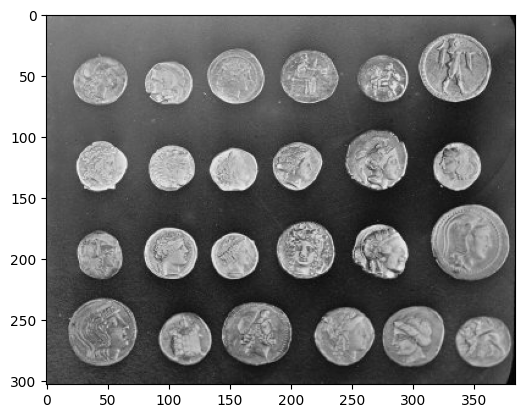

In [6]:
img = imread('S03i3165l01.jpg')
plt.imshow(img)
plt.show()

Funcion que informa sobre datos de la imagen obtenida

In [7]:
def data_img(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

data_img(img)

size =  (303, 384, 3)
max  =  252
min  =  1


Extraccion de una parte de la imagen

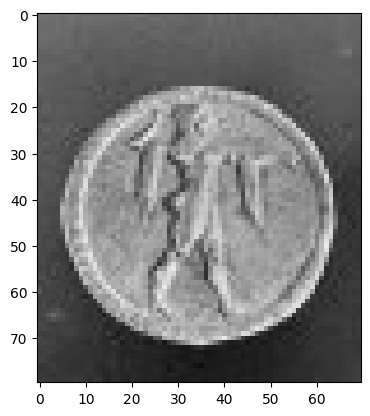

In [29]:
# Primero alto, despues ancho
img_cropped = img[0:80, 300:370]
plt.imshow(img_cropped, cmap='gray')
plt.show()

In [31]:
data_img(img_cropped)

size =  (80, 70, 3)
max  =  234
min  =  14


Lectura de un solo canal de la imagen

In [32]:
X = img_cropped[:,:,0]
data_img(X)

size =  (80, 70)
max  =  234
min  =  14


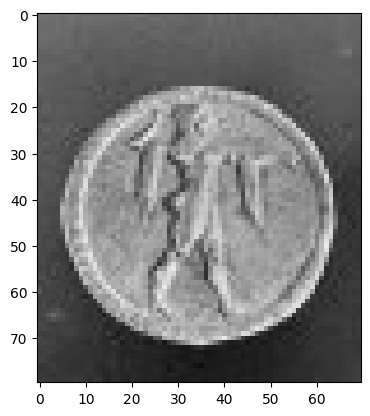

In [33]:
plt.imshow(img_cropped, cmap='gray')
plt.show()

## Thresholding - Segmentación simple

In [34]:
def segmenta(X,t):
    # X: imagen de entrada (matriz 2D)
    # t: valor de umbral (threshold)

    (N,M) = X.shape  # Obtiene dimensiones de la imagen
    Y = np.zeros((N,M))  # Crea matriz de ceros del mismo tamaño
    #area = 0  # Inicializa contador de píxeles

    # Recorre cada píxel de la imagen
    for i in range(N):  # Recorre filas
        for j in range(M):  # Recorre columnas
            if X[i,j] > t:  # Si el píxel supera el umbral
                Y[i,j] = 255  # Lo marca como blanco
                #area = area + 1  # Incrementa el contador

    #print('area = ',area)  # Imprime área total
    return Y  # Devuelve imagen segmentada

size =  (80, 70)
max  =  255.0
min  =  0.0


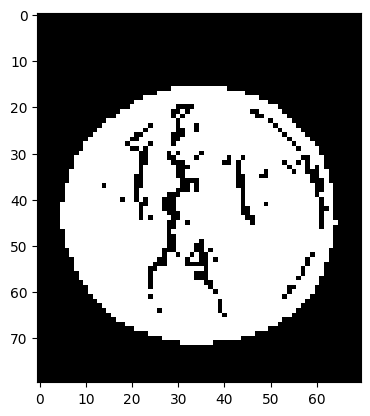

In [36]:
# 1. Llamada a la función de segmentación
Y = segmenta(X, 120)  # Segmenta la imagen usando umbral 120

# 2. Analiza las propiedades de la imagen resultante
data_img(Y)

# 3. Visualiza la imagen segmentada
plt.imshow(Y, cmap='gray')
plt.show()

Todas las monedas

size =  (303, 384)
max  =  252
min  =  1


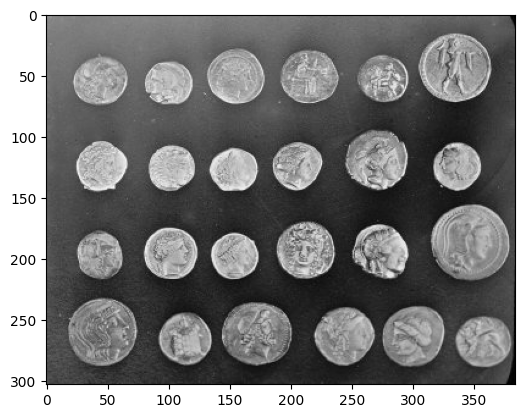

In [20]:
full_img = imread('S03i3165l01.jpg')
X   = full_img[:,:,0]
data_img(X)
plt.imshow(X,cmap='gray')
plt.show()

area =  48864


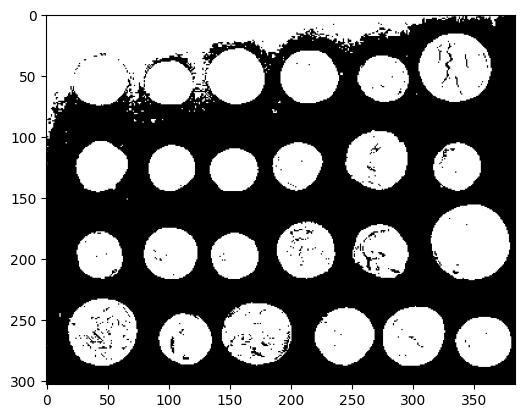

In [21]:
Y = segmenta(X,100)
plt.imshow(Y,cmap='gray')
plt.show()

area =  23765


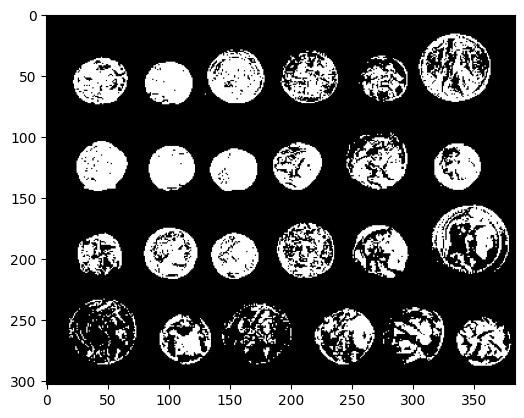

In [22]:
Y = segmenta(X,150)
plt.imshow(Y,cmap='gray')
plt.show()

## Definición de un fondo homogéneo

El propósito de este código es:

* Normalizar la iluminación por filas
* Reducir variaciones de fondo
* Mejorar el contraste local
* Facilitar la segmentación posterior

Por ejemplo:

Si una fila tiene valores [100, 120, 150] y el mínimo es 100 después de la normalización: [0, 20, 50]

Esto es útil cuando:

* Hay variaciones de iluminación en la imagen
* El fondo no es uniforme
* Se necesita resaltar objetos sobre el fondo
* Se quiere preparar la imagen para segmentación

La imagen resultante tendrá:

* Fondo más uniforme
* Objetos más destacados
* Mejor contraste local
* Más facilidad para aplicar umbralización

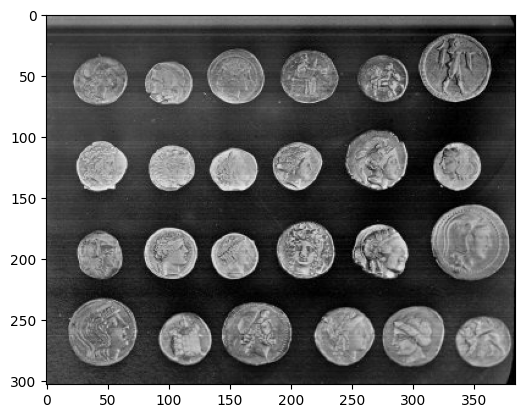

In [23]:
# 1. Obtiene las dimensiones de la imagen
(N,M) = X.shape  # N = número de filas, M = número de columnas

# 2. Crea una matriz vacía del mismo tamaño
Xm = np.zeros((N,M), np.uint8)  # Matriz de ceros de 8 bits

# 3. Procesa cada fila de la imagen
for i in range(N):
    xmin = np.min(X[i,:])  # Encuentra el valor mínimo de la fila
    Xm[i,:] = X[i,:] - xmin  # Resta el mínimo a toda la fila

# 4. Visualiza el resultado
plt.imshow(Xm, cmap='gray')
plt.show()

area =  19845


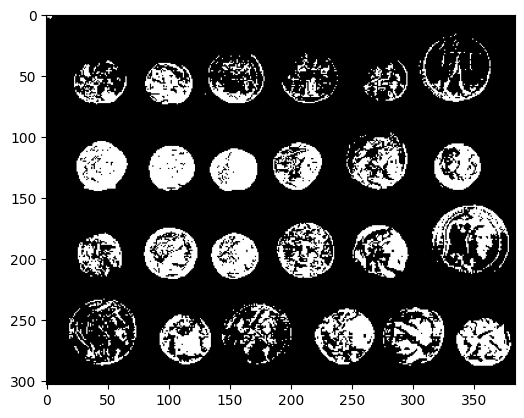

In [28]:
Y = segmenta(Xm,135)
plt.imshow(Y,cmap='gray')
plt.show()